In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

import datetime

Punto 1:

In [3]:
datos = pd.read_csv("D:\descargas\sube-2023.csv") # Lee el archivo csv de los datos de sube
datos.info() # comando para ver la cantidad de entradas y el tipo de dato de cada columna

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\tomi6\AppData\Local\Temp\ipykernel_23736\4090877141.py:1: SyntaxWarning: invalid escape sequence '\d'
  datos = pd.read_csv("D:\descargas\sube-2023.csv") # Lee el archivo csv de los datos de sube


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   472291 non-null  object
 1   NOMBRE_EMPRESA   472291 non-null  object
 2   LINEA            472291 non-null  object
 3   AMBA             472291 non-null  object
 4   TIPO_TRANSPORTE  472291 non-null  object
 5   JURISDICCION     469742 non-null  object
 6   PROVINCIA        469720 non-null  object
 7   MUNICIPIO        469720 non-null  object
 8   CANTIDAD         472291 non-null  int64 
 9   DATO_PRELIMINAR  472291 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.0+ MB


In [4]:
datos["DIA_TRANSPORTE"] = pd.to_datetime(datos["DIA_TRANSPORTE"]) # se convierte de tipo object a tipo fecha la variable fecha transporte
datos.info() # para verificar que realmente se cambio.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   472291 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   472291 non-null  object        
 2   LINEA            472291 non-null  object        
 3   AMBA             472291 non-null  object        
 4   TIPO_TRANSPORTE  472291 non-null  object        
 5   JURISDICCION     469742 non-null  object        
 6   PROVINCIA        469720 non-null  object        
 7   MUNICIPIO        469720 non-null  object        
 8   CANTIDAD         472291 non-null  int64         
 9   DATO_PRELIMINAR  472291 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 36.0+ MB


In [5]:
datos["DIA_TRANSPORTE"]

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
472286   2023-12-31
472287   2023-12-31
472288   2023-12-31
472289   2023-12-31
472290   2023-12-31
Name: DIA_TRANSPORTE, Length: 472291, dtype: datetime64[ns]

In [6]:

datos['FECHA_DIA'] = datos["DIA_TRANSPORTE"].dt.weekday # Crea la columna Fecha convirtiendo cada fecha en un dia de la semana del 0 al 6
def diafecha(dato): # Funcion que convierte el dia de la semana de numero a Palabras.
    match dato:
        case 6:
            return 'Domingo'
        case 0:
            return 'Lunes'
        case 1:
            return 'Martes'
        case 2:
            return 'Miercoles'
        case 3:
            return 'Jueves'
        case 4:
            return 'Viernes'
        case 5:
            return 'Sabado'

datos['FECHA_DIA'] = datos['FECHA_DIA'].map(diafecha) # Aplica la funcion a la columna del dataframe
datos["FECHA_MES"] = datos["DIA_TRANSPORTE"].dt.strftime('%d') # Transforma la fecha a dia del mes
datos["FECHA_ORDINAL"] = datos["DIA_TRANSPORTE"].dt.strftime('%j') # Transforma la fecha a dia del año

# Era mas facil usar strftime de datetime para el dia de la semana pero quedaban los dias en ingles asi que hice una funcion aparte.


In [7]:
datos.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Domingo,01,001
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Domingo,01,001
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Domingo,01,001
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Domingo,01,001
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Domingo,01,001


In [8]:
datos_amba = datos[datos["AMBA"]=='SI']
datos_amba = datos_amba.drop(columns=['AMBA', 'DATO_PRELIMINAR','PROVINCIA'],axis=1)
datos_amba = datos_amba[['DIA_TRANSPORTE','FECHA_DIA','FECHA_MES','FECHA_ORDINAL','JURISDICCION','LINEA','CANTIDAD','TIPO_TRANSPORTE','MUNICIPIO','NOMBRE_EMPRESA']]
datos_amba = datos_amba.rename(columns={'DIA_TRANSPORTE':'FECHA','CANTIDAD':'PASAJEROS'})
datos_amba.head()

,FECHA,FECHA_DIA,FECHA_MES,FECHA_ORDINAL,JURISDICCION,LINEA,PASAJEROS,TIPO_TRANSPORTE,MUNICIPIO,NOMBRE_EMPRESA
0,2023-01-01,Domingo,01,001,MUNICIPAL,1,61,COLECTIVO,MERCEDES,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...
1,2023-01-01,Domingo,01,001,MUNICIPAL,2B,11,COLECTIVO,MERCEDES,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...
3,2023-01-01,Domingo,01,001,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO,SN,COMPAÑIA DE TRANSPORTE VECINAL S.A.
5,2023-01-01,Domingo,01,001,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO,ALMIRANTE BROWN,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...
6,2023-01-01,Domingo,01,001,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO,LANUS,EL URBANO SRL


In [9]:
(datos_amba.groupby('TIPO_TRANSPORTE')['PASAJEROS'].sum()/(datos_amba['PASAJEROS'].sum()))*100

TIPO_TRANSPORTE
COLECTIVO    83.767693
SUBTE         6.808356
TREN          9.423951
Name: PASAJEROS, dtype: float64

Aqui se aprecia que el colectivo representa un 83.8% de la cantidad total de pasajeros del 2023, mientras que el tren y el subte representan un 9.4% y 6.8% respectivamente

In [10]:
datos_ambacopia = datos_amba # Creo una copia para no modificar el dataframe de amba
datos_ambacopia['MES'] = datos_ambacopia['FECHA'].dt.strftime('%m') # paso la fecha a mes
datos_ambacopia = datos_ambacopia[datos_ambacopia["TIPO_TRANSPORTE"]=='SUBTE'] # me quedo solo con el subte
datos_ambacopia.groupby(['MES','LINEA'])["PASAJEROS"].sum().sort_values(ascending=False) # agrupa por mes y linea y calcula la cantidad de pasajeros de ese mes.

MES  LINEA       
08   LINEA_B         5227906
11   LINEA_B         5194081
09   LINEA_B         5186346
10   LINEA_B         5173465
07   LINEA_B         5108572
                      ...   
06   LIN_PREMETRO      39249
02   LIN_PREMETRO      39194
11   LIN_PREMETRO      39018
12   LIN_PREMETRO      37417
01   LIN_PREMETRO      36407
Name: PASAJEROS, Length: 84, dtype: int64

Si bien este codigo no devuelve una tupla sola como pide el ejercicio, se puede observar claramente la linea B en el mes 8 (agosto) tiene la mayor cantidad de pasajeros

In [11]:
datos_ambacopia.groupby(['FECHA_DIA'])["PASAJEROS"].std().sort_values(ascending=False)

FECHA_DIA
Jueves       71433.029309
Martes       70145.609160
Miercoles    69053.662339
Viernes      68555.144716
Lunes        67436.341871
Sabado       36446.944364
Domingo      19647.157831
Name: PASAJEROS, dtype: float64

Al igual que el punto anterior, este no devuelve solo una tupla pero se puede observar que el dia habil con menor desvio estandar en cantidad de pasajeros es el lunes. Si se tomaran en cuenta los dias no habiles el domingo seria el dia con menor desvio estandar.

Punto 2:


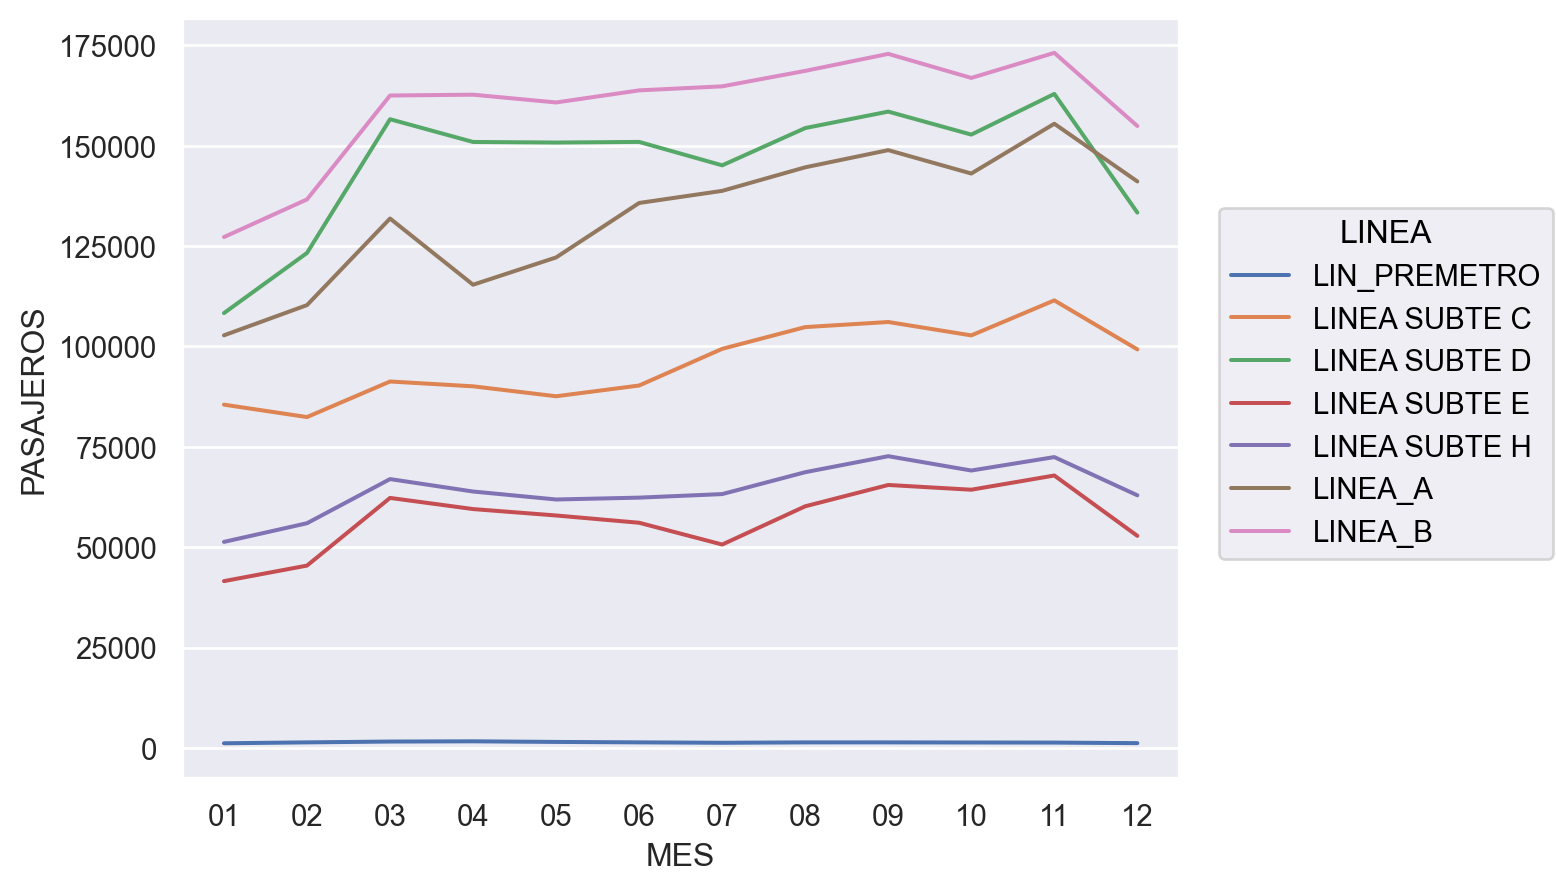

In [12]:
(
    so.Plot(data=datos_ambacopia,x='MES',y='PASAJEROS')
    .add(so.Line(),so.Agg('mean'),color='LINEA')
)

In [13]:
media_subte = datos_ambacopia.groupby(['LINEA'])['PASAJEROS'].mean()
std_subte = datos_ambacopia.groupby(['LINEA'])['PASAJEROS'].std()


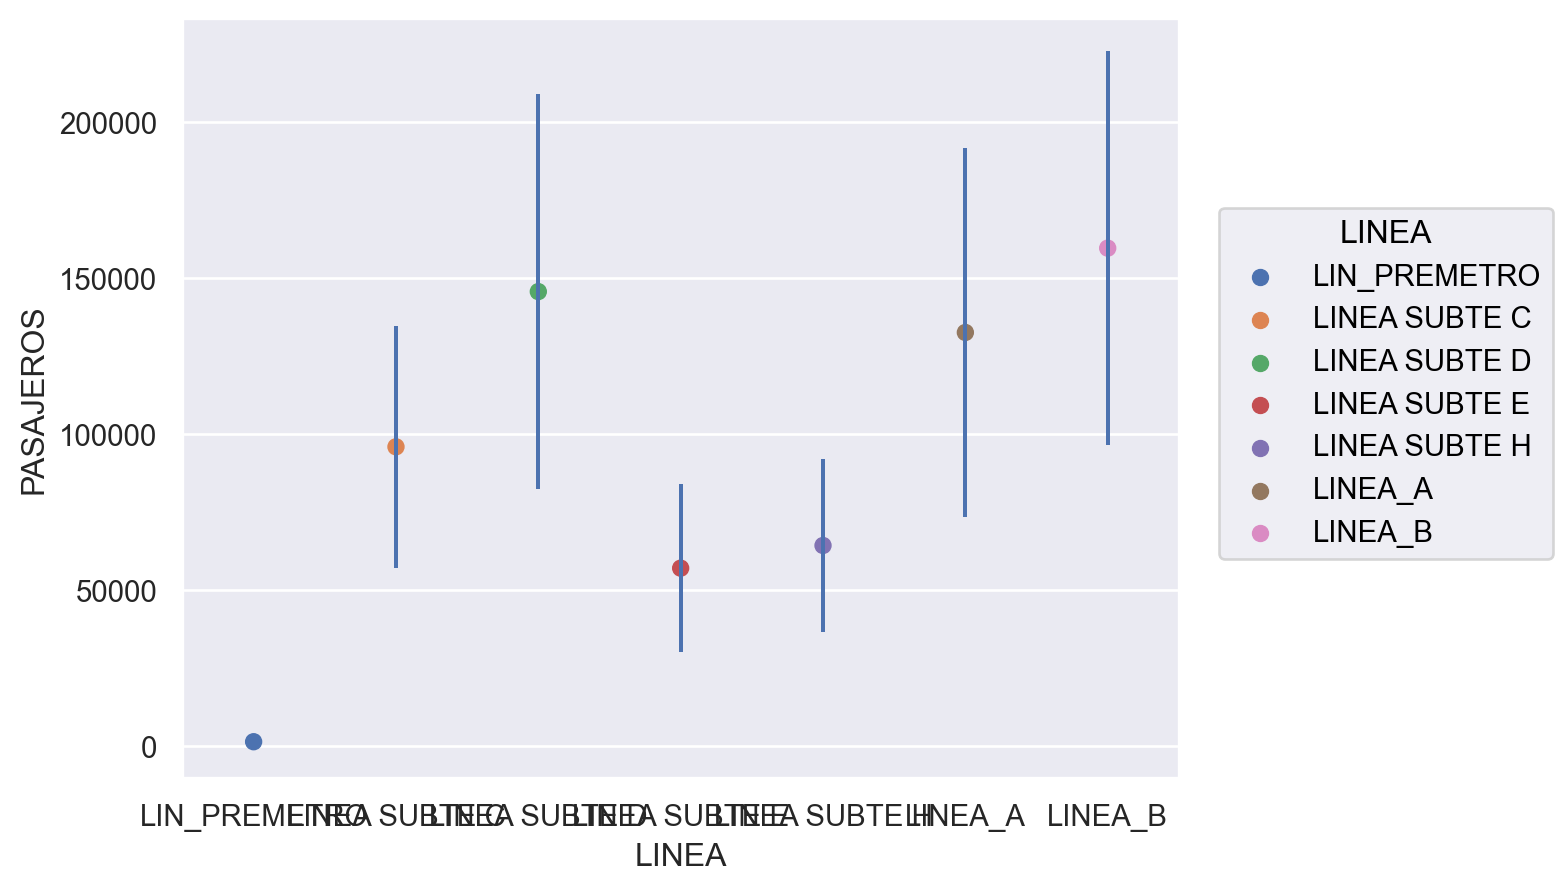

In [14]:
(
    so.Plot(data=datos_ambacopia,x='LINEA',y='PASAJEROS')
    .add(so.Dot(),so.Agg('mean'),color='LINEA')
    .add(so.Range(),so.Est(errorbar="sd"))
)

C:\Users\tomi6\AppData\Local\Temp\ipykernel_23736\4120619547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pais['MES'] = datos_pais['DIA_TRANSPORTE'].dt.strftime('%m')


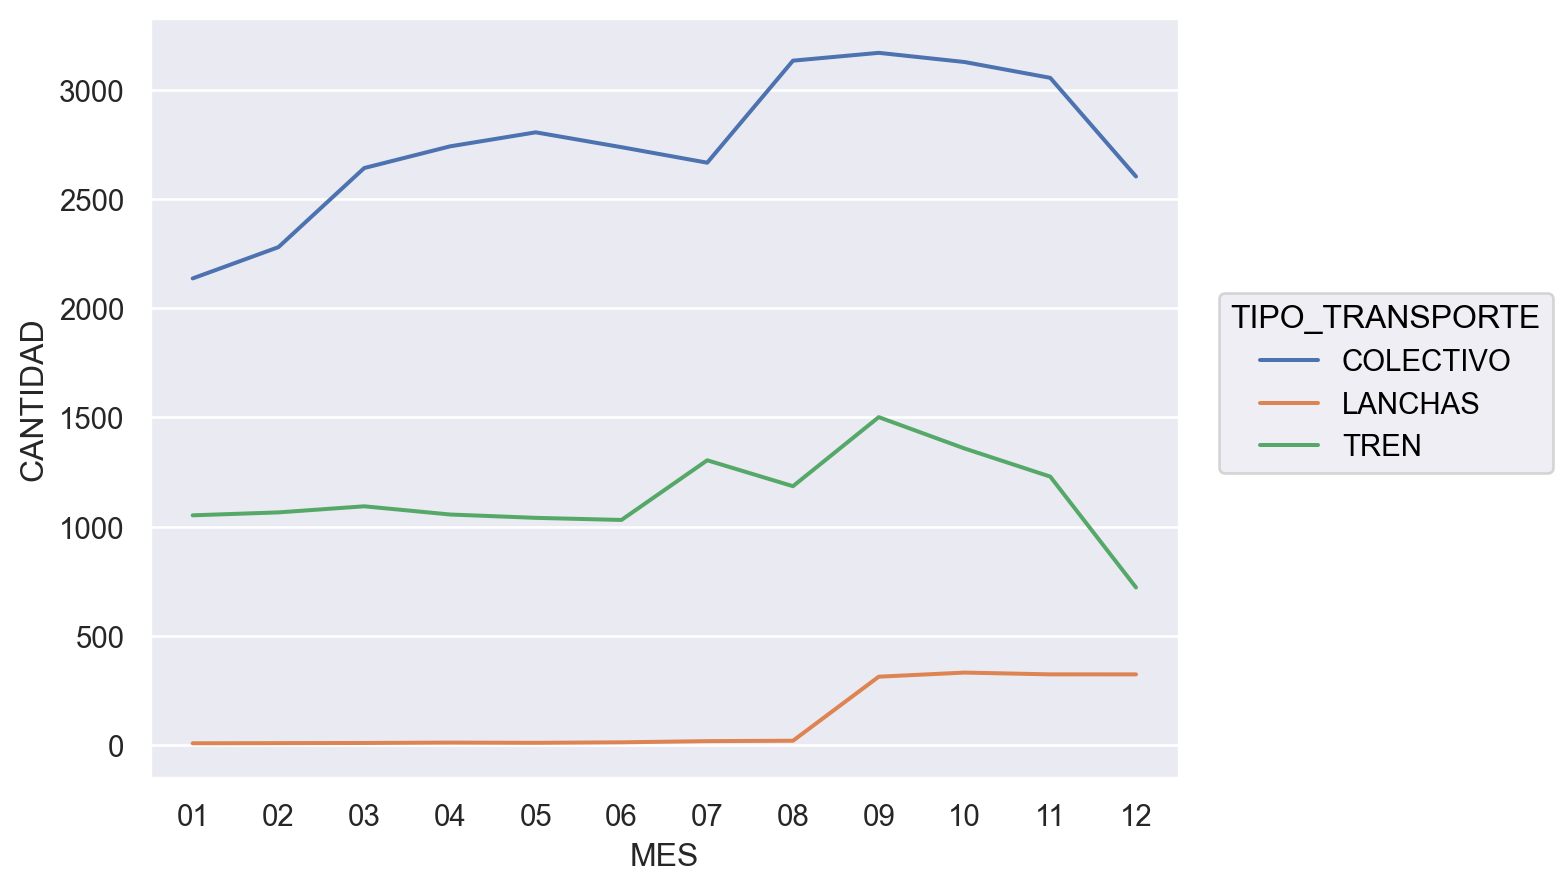

In [15]:
datos_pais = datos[datos["AMBA"]=='NO']
datos_pais['MES'] = datos_pais['DIA_TRANSPORTE'].dt.strftime('%m')
(
    so.Plot(data=datos_pais,x='MES',y='CANTIDAD')
    .add(so.Line(),so.Agg('mean'),color='TIPO_TRANSPORTE')
    
)

Punto 3:

In [16]:
datos_regresion = pd.read_csv("D:\descargas\sube-2023-regresion.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\tomi6\AppData\Local\Temp\ipykernel_23736\3018775059.py:1: SyntaxWarning: invalid escape sequence '\d'
  datos_regresion = pd.read_csv("D:\descargas\sube-2023-regresion.csv")


In [17]:
datos_colectivoJN = datos_regresion[(datos_regresion["AMBA"]=='SI')&(datos_regresion["PROVINCIA"]=='JN') & (datos_regresion['TIPO_TRANSPORTE']=="COLECTIVO")]
datos_colectivoJN.LINEA.unique()

array(['BS_ASLINEA_123', 'BSAS_LINEA_002', 'BSAS_LINEA_009',
       'BSAS_LINEA_010', 'BSAS_LINEA_015', 'BSAS_LINEA_017',
       'BSAS_LINEA_019', 'BSAS_LINEA_020', 'BSAS_LINEA_021',
       'BSAS_LINEA_022', 'BSAS_LINEA_024', 'BSAS_LINEA_026',
       'BSAS_LINEA_029', 'BSAS_LINEA_032', 'BSAS_LINEA_034',
       'BSAS_LINEA_037', 'BSAS_LINEA_039', 'BSAS_LINEA_041',
       'BSAS_LINEA_045', 'BSAS_LINEA_046', 'BSAS_LINEA_047',
       'BSAS_LINEA_049', 'BSAS_LINEA_051', 'BSAS_LINEA_053',
       'BSAS_LINEA_055', 'BSAS_LINEA_056', 'BSAS_LINEA_057',
       'BSAS_LINEA_059', 'BSAS_LINEA_060', 'BSAS_LINEA_061',
       'BSAS_LINEA_062', 'BSAS_LINEA_063', 'BSAS_LINEA_064',
       'BSAS_LINEA_065', 'BSAS_LINEA_067', 'BSAS_LINEA_068',
       'BSAS_LINEA_070', 'BSAS_LINEA_071', 'BSAS_LINEA_074',
       'BSAS_LINEA_075', 'BSAS_LINEA_078', 'BSAS_LINEA_079',
       'BSAS_LINEA_080', 'BSAS_LINEA_084', 'BSAS_LINEA_085',
       'BSAS_LINEA_086', 'BSAS_LINEA_087', 'BSAS_LINEA_088',
       'BSAS_LINEA_090',

In [18]:
lineas = datos_colectivoJN["LINEA"].unique()
pasajeros_por_linea = pd.DataFrame()

for linea in lineas:
    datos_linea = datos_colectivoJN[datos_colectivoJN["LINEA"]==linea][["DIA_TRANSPORTE","CANTIDAD"]]
    datos_linea = datos_linea.set_index("DIA_TRANSPORTE").rename(columns={'CANTIDAD':linea})
    pasajeros_por_linea = pd.concat([pasajeros_por_linea,datos_linea],axis=1)
    
pasajeros_por_linea.shape

(250, 136)

In [19]:
pasajeros_por_linea = pasajeros_por_linea.dropna(axis=1)
pasajeros_por_linea.shape

(250, 124)

In [20]:
(pasajeros_por_linea.isnull().sum() >0).sum()  # Cantidad de datos faltantes por columna

0

In [21]:
# formula = 'bill_depth_mm ~ bill_length_mm * species'
# y_train, X_train =  Formula(formula).get_model_matrix(penguins_train)

In [109]:
y = pasajeros_por_linea["BSAS_LINEA_009"]
X = pasajeros_por_linea.drop('BSAS_LINEA_009',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
X.head()

(200, 123) (50, 123)
(200,) (50,)


,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,BSAS_LINEA_024,...,LINEA 4,LINEA 42,LINEA 44,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5177,9109,7013,1604,2617,11235,2202,7599,...,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
2023-01-02,9440,21759,21176,45269,29962,13921,11934,55611,13823,30397,...,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
2023-01-04,10540,24755,23806,52873,33659,16172,13366,61721,16206,33567,...,17836,21609,23595,18448,12193,13949,19860,26294,11981,21784
2023-01-05,10408,25772,24688,53436,35182,16569,12929,62510,16863,34352,...,18044,21993,23687,18481,12888,14668,21235,27216,11787,22972
2023-01-06,10530,26021,24167,53163,35212,16459,12955,63528,16846,34874,...,18122,22421,23731,19300,12703,14199,23472,27073,11567,23411


In [115]:
modelo = linear_model.LinearRegression() 

# Train the model
modelo.fit(X_train, y_train)
# Make predictions
y_pred = modelo.predict(X_test)
# Evaluate the model using mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 5611.65781
R cuadrado: 0.70327


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.max() 

# Inicializamos el modelo lineal
modeloLineal = linear_model.Ridge(alpha = 0.5) 

# Entrenamiento
modeloLineal.fit(X_train_scaled, y_train)

# Predicciones
y_pred = modeloLineal.predict(X_train_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_train, y_pred)
print(f"R cuadrado: {r2:.5f}")

print(y_train.shape,y_pred.shape)

Raíz del Error Cuadrático Medio: 1211.37944
R cuadrado: 0.98532
(200,) (200,)


In [117]:
X_test_scaled = scaler.transform(X_test)
# Predicciones
y_pred = modeloLineal.predict(X_test_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 2781.56398
R cuadrado: 0.92710


               0
0   -1336.398757
1     302.731253
2    -580.226685
3     352.711227
4     603.712500
..           ...
118  1181.889543
119   984.200857
120  -863.631028
121   433.122320
122  2673.783659

[123 rows x 1 columns]


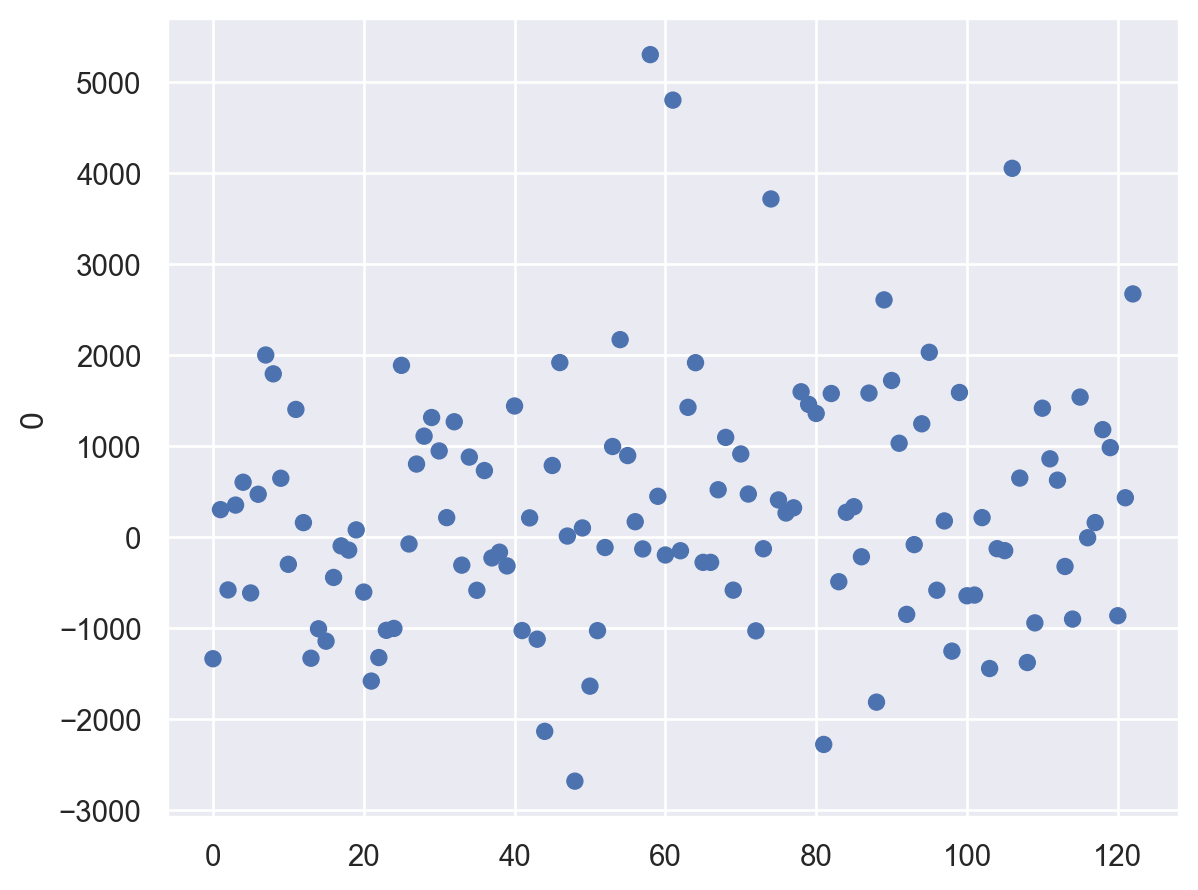

In [113]:
# Observamos los coeficientes
x1 = pd.DataFrame(modeloLineal.coef_.tolist()) 
print(x1)
(
    so.Plot(x=np.arange(len(x1.squeeze())),y=x1.squeeze())
    .add(so.Dot())
)

Se ve que hay algunos coeficientes altos, como ya estan escaladas las variables, significa que son coeficientes relevantes.

In [114]:
coeficientesAltos = [i for i, j in enumerate(modeloLineal.coef_) if j > 2500] # Busco los coeficientes con valor mayor a 2000

for coef in coeficientesAltos:
    print(y.corr(X.iloc[:,coef])) # Miro la correlacion de La linea 9 con cada linea a la que pertenece respectivo coeficiente

0.9537797238262269
0.9464944629535221
0.945622666149943
0.9714366391573919
0.9768015213039354
0.9563850591068273


Se ve que no eran altos por nada, tienen una buena correlacion con la variable y, osea la linea 9

In [28]:
xquizas = X.iloc[:,coeficientesAltos]
xquizas.head()

,BSAS_LINEA_108,BSAS_LINEA_111,BSAS_LINEA_135,BSAS_LINEA_168,LINEA 101,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,
2023-01-01,1972,3270,3822,3801,6080,3210
2023-01-02,13084,16264,22613,29578,30405,19362
2023-01-04,16166,17710,25607,33352,32545,21784
2023-01-05,15774,19240,26221,34594,35067,22972
2023-01-06,16065,19420,24224,35410,35070,23411


In [29]:
modelo = linear_model.LinearRegression() 
# Train the model
modelo.fit(xquizas, y)
# Make predictions
y_pred = modelo.predict(xquizas)
# Evaluate the model using mean squared error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 1861.39469
R cuadrado: 0.96582


Si fiteamos, obtenemos un que la raiz del ecm es 1800 y el r cuadrado 0.965, nada mal puesto que estamos usando 120 variables menos para predecir (raiz del ecm 1200 y r cuadrado 0.985 usando todas las lineas de colectivo disponibles).

In [30]:
# Vamos a probar con las lineas 108, 111, 168, 101 y 164
pasajeros_por_linea = pasajeros_por_linea.rename(columns={"LINEA 101":"LINEA_101"}) # Renombro linea porque esta bugueado sino
formula = 'BSAS_LINEA_009 ~ (BSAS_LINEA_108 + BSAS_LINEA_111 + BSAS_LINEA_168 + LINEA_101 + LINEA_164_AMBA)'
y, X =  Formula(formula).get_model_matrix(pasajeros_por_linea)
X.head()

,Intercept,BSAS_LINEA_108,BSAS_LINEA_111,BSAS_LINEA_168,LINEA_101,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,
2023-01-01,1.0,1972,3270,3801,6080,3210
2023-01-02,1.0,13084,16264,29578,30405,19362
2023-01-04,1.0,16166,17710,33352,32545,21784
2023-01-05,1.0,15774,19240,34594,35067,22972
2023-01-06,1.0,16065,19420,35410,35070,23411


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Si no agregamos ninguna opción, el programa va a agregar un nuevo intercept al realizar la regresión.
modelo = linear_model.LinearRegression() 

# Train the model
modelo.fit(X_train, y_train)

# Make predictions
y_pred = modelo.predict(X_test)

# Evaluate the model using mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")
print(modelo.intercept_)
print(modelo.coef_[0:6])

Raíz del Error Cuadrático Medio: 1848.87152
R cuadrado: 0.96434
[-1105.4485323]
[[0.         0.31064788 0.21718815 0.10482711 0.35929558 0.0384969 ]]


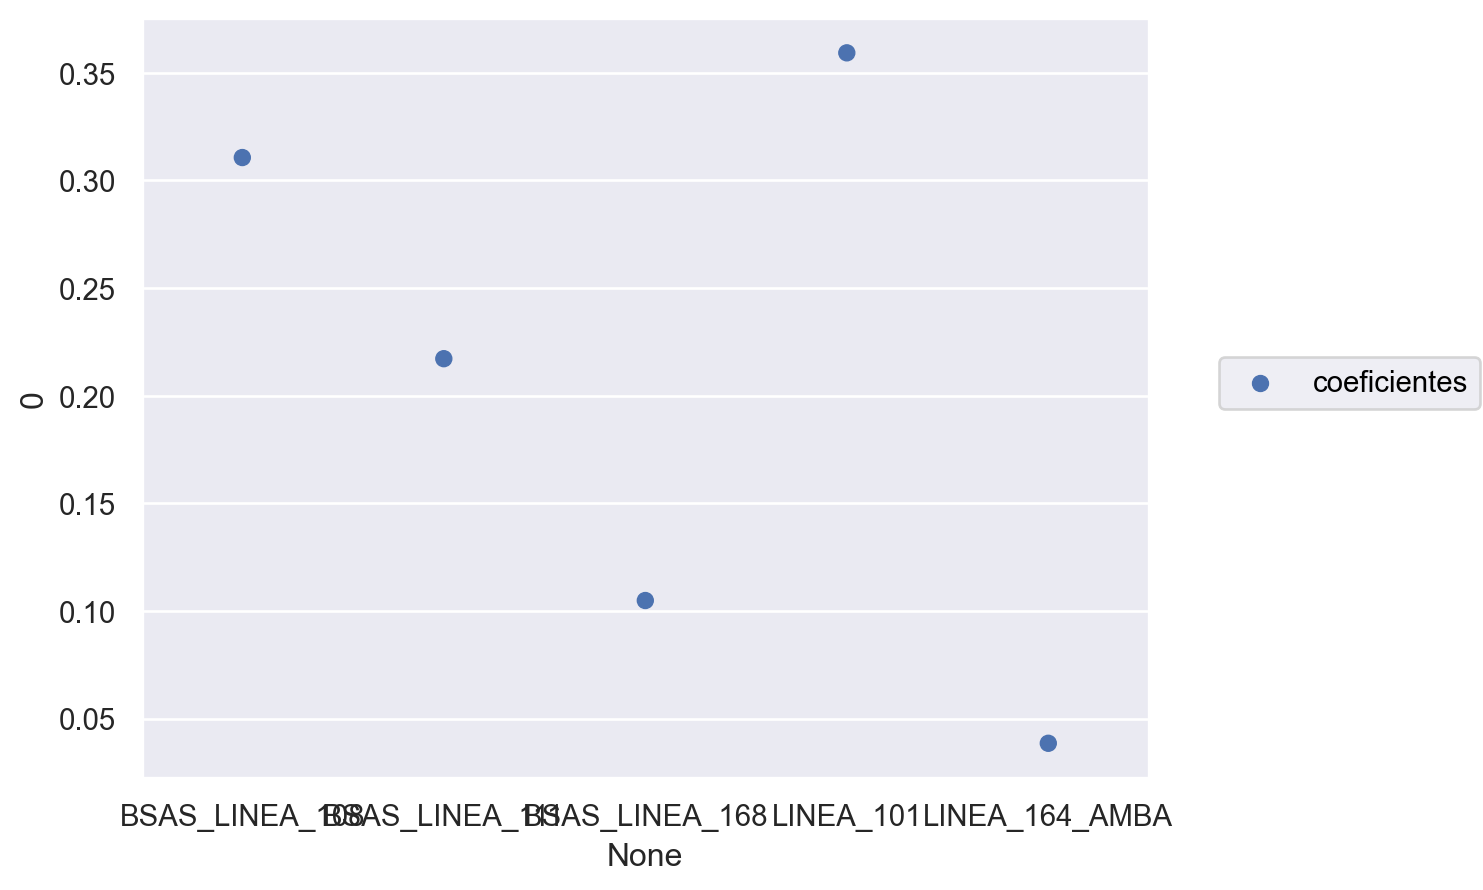

In [32]:
a = pd.DataFrame(modelo.coef_, columns=X_train.columns)
a.pop('Intercept')
b =  a.iloc[0].reset_index(drop=True).squeeze()
so.Plot(x=a.columns ,y = b).add(so.Dot(),label="coeficientes")

In [118]:
# Definimos los subconjuntos para la validación cruzada.
cv = KFold(n_splits=5, random_state=42, shuffle=True)
pliegos = cv.split(X)
# Utilizamos KFold de sklearn

modelo1 = linear_model.LinearRegression(fit_intercept = False)    # No utlizamos el intercept ya que viene dado por el dataframe que devuelve formulaic.
rmse1 = np.zeros(cv.get_n_splits())
r2 = np.zeros(cv.get_n_splits())
ind=0
for train_index, val_index in cv.split(X):
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    r2[ind] = r2_score(y_val,y_pred)
    ind = ind + 1

In [38]:
print(rmse1.mean())
print(r2.mean())


1877.6003911424827
0.962564403447552
